# `blobs`
``blobs`` is a simple function to generate a test image.  It works by generating random noise, applying a guassian blur, renormalizing the result back to a uniform distribution, then thresholding the result to produce a binary image.


In [1]:
import porespy as ps
import matplotlib.pyplot as plt
import numpy as np

## `shape`
Both 2D and 3D images can be generated.  Sending a scalar (``shape=100``) will produce a 3D image of size ``100^3``.

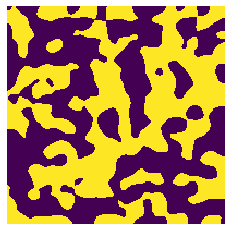

In [4]:
shape = [200, 200]
im = ps.generators.blobs(shape=shape)
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.imshow(im, origin='lower', interpolation='none')
ax.axis(False);

## `porosity`

The fraction of the ``True`` to ``False`` pores can be set by specifying the porosity.  The default is 0.5.

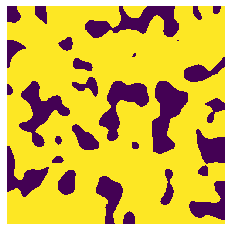

In [6]:
e = 0.75
im = ps.generators.blobs(shape=[500, 500], porosity=e)
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.imshow(im, origin='lower', interpolation='none')
ax.axis(False);

Specifying ``porosity=None`` will return a greyscale image which can then be thresholded to get a boolean image.  The greyscale value are adjusted to a unifrom distribution:

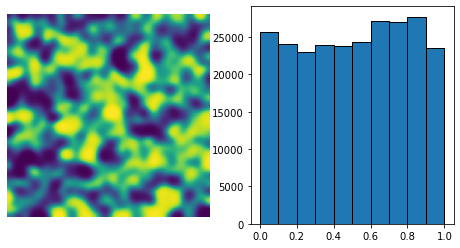

In [9]:
im = ps.generators.blobs(shape=[500, 500], porosity=None)
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

ax[0].imshow(im, origin='lower', interpolation='none')
ax[0].axis(False)

ax[1].hist(im.flatten(), edgecolor='k');

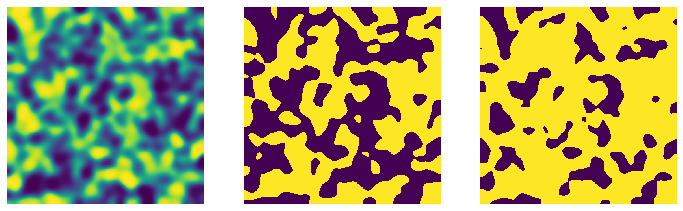

In [16]:
im = ps.generators.blobs(shape=[500, 500], porosity=None, blobiness=1)
fig, ax = plt.subplots(1, 3, figsize=[12, 4])
ax[0].imshow(im, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(im < 0.5, origin='lower', interpolation='none')
ax[1].axis(False)
ax[2].imshow(im < 0.75, origin='lower', interpolation='none')
ax[2].axis(False);

## `blobiness`
The size and anisotropy of the blobs can be changed:

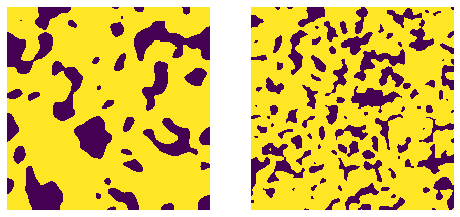

In [17]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

im1 = ps.generators.blobs(shape=shape, porosity=e, blobiness=1)
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[0].axis(False)

im2 = ps.generators.blobs(shape=shape, porosity=e, blobiness=2)
ax[1].imshow(im2, origin='lower', interpolation='none')
ax[1].axis(False);


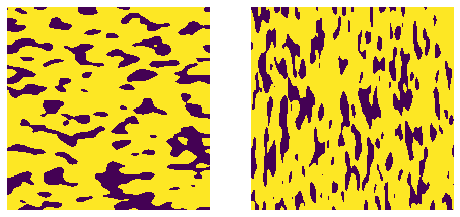

In [18]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

im1 = ps.generators.blobs(shape=shape, porosity=e, blobiness=[2, 1])
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[0].axis(False)

im2 = ps.generators.blobs(shape=shape, porosity=e, blobiness=[1, 3])
ax[1].imshow(im2, origin='lower', interpolation='none')
ax[1].axis(False);

## Reproducing Images
The random is controlled by numpy's random number generator so the same image can be produced by setting the seed:

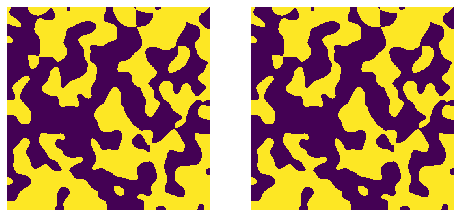

In [20]:
np.random.seed(0)
im1 = ps.generators.blobs(shape=[500, 500], porosity=0.5)
np.random.seed(0)
im2 = ps.generators.blobs(shape=[500, 500], porosity=0.5)
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(im2, origin='lower', interpolation='none')
ax[1].axis(False);